### Required:
- python
- pandas
- jupyter
- notebook
- matplotlib
- dtaidistance

__Author: Utpal Kumar @Institute of Earth Sciences, Academia Sinica__

In [1]:
from dtwclustering.dtw_analysis import dtw_signal_pairs, dtw_clustering
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from dtaidistance import dtw
%matplotlib inline 

# default matplotlib parameters
import matplotlib
font = {'family': 'Times',
        'weight': 'bold',
        'size': 22}

matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (12, 6)
plt.style.use('ggplot')

In [2]:
np.random.seed(0)
# sampling parameters
fs = 100   # sampling rate, in Hz
T = 1      # duration, in seconds
N = T * fs  # duration, in samples

# time variable
t = np.linspace(0, T, N)

SNR = 0.2 #noise

XX0 = np.sin(2 * np.pi * t * 7+np.pi/2) + np.random.randn(1, N) * SNR
XX1 = signal.sawtooth(2 * np.pi * t * 5+np.pi/2) + \
            np.random.randn(1, N) * SNR
s1, s2 = XX0[0], XX1[0]

## Inspect the DTW distance between two signals
Uses dtaidistance package under the hood (https://dtaidistance.readthedocs.io/en/latest/usage/dtw.html)

In [3]:
dtwsig = dtw_signal_pairs(s1, s2, labels=['s1', 's2'])

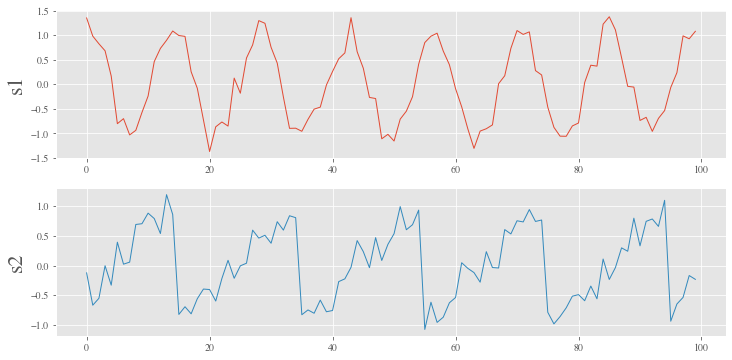

In [4]:
dtwsig.plot_signals()
plt.show()

DTW distance between signals: 4.8915


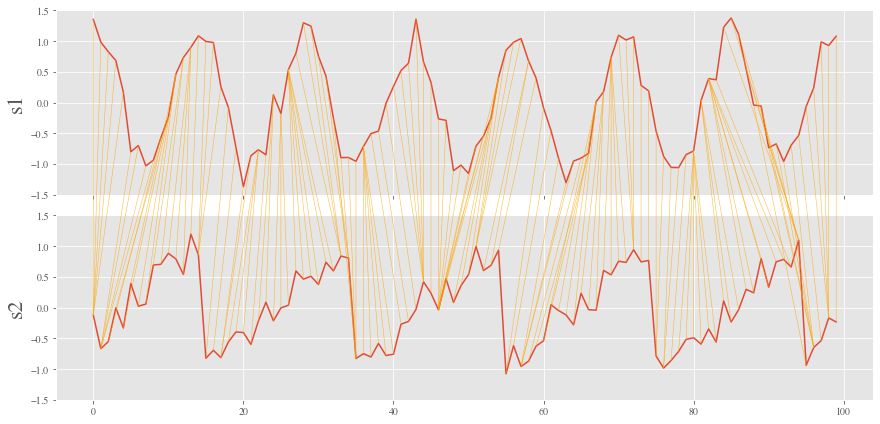

In [5]:
distance,_,_ = dtwsig.plot_warping_path()
print(f"DTW distance between signals: {distance:.4f}")

plt.show()

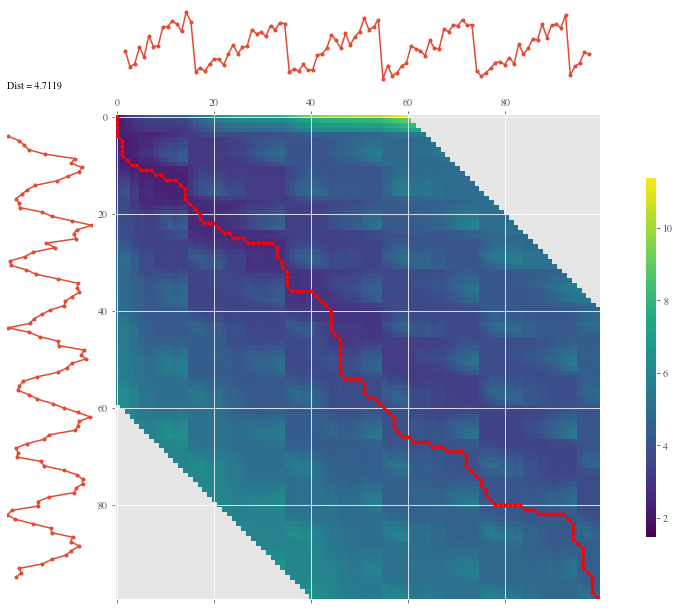

In [6]:
dtwsig.plot_matrix(windowfrac=0.6, psi=None, plot_best_path=False)
plt.show()

## DTW analysis for multiple signals